<a href="https://colab.research.google.com/github/dnezan/km-sku-prediction/blob/main/KM_forecast_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KwickMetrics Forecast Practice**
Dinesh Sreekanthan<br>
https://github.com/dnezan/km-sku-prediction

# Data Overview
The dataset has 3 columns
<br>
*   SKU ID
*   Date
*   Number of items sold that day

By using the function `=COUNTUNIQUE(A:A)` in Google Spreadsheets or `Dataframe.unique()` in Pandas, we can find the number of unique items being sold. <br>

**There are 3786 unique items being sold over a period of about 1 year (01.01.2021 - 25.11.2021)**

# Setting up Cloud Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive"

/content/drive/My Drive


In [ ]:
!mkdir km-forecast-practice

mkdir: cannot create directory ‘km-forecast-practice’: File exists
 360review	    km-forecast-practice
'Colab Notebooks'   km-forecast-practice-data.gsheet
 csvfiles	   'Untitled spreadsheet.gsheet'
 Invoice.gsheet


In [ ]:
%cd "/content/drive/My Drive/km-forecast-practice"

/content/drive/My Drive/km-forecast-practice


Make sure to move your dataset `km-forecast-practice.csv` to this folder.

In [ ]:
!ls

dataset_new.csv  graph3.png  graph.svg			    temppp.csv
graph2.png	 graph.png   km-forecast-practice-data.csv


In [ ]:
import pandas as pd
import csv
import datetime

df=pd.read_csv('km-forecast-practice-data.csv')
df['timestamp']= pd.to_datetime(df['timestamp'])
print(df.dtypes)
df.head()

item_id              object
timestamp    datetime64[ns]
demand                int64
dtype: object


,item_id,timestamp,demand
0,AP001AA01,2021-01-01,10
1,AP001AA01,2021-01-02,6
2,AP001AA01,2021-01-03,9
3,AP001AA01,2021-01-04,7
4,AP001AA01,2021-01-05,10


# Preprocessing the Data
The first step is to rearrange the data so that we have each column representing a day and the rows containing the SKU ID. <br> 
We must also populate the data with missing dates, which we assume have 0 items sold on that day. So the first step is to add the missing dates, then set these as 0.

In [ ]:
start_date=df.timestamp[0].date()  
end_date=df.timestamp.iat[-1].date()
start_sku=df.item_id[1]
print('Start date is',start_date)
print('End date is',end_date)
print("First SKU is",start_sku)

data = [[start_sku, 0]]

# Populating the new dataset with first row
df_new = pd.DataFrame(data, columns = ['SKU', start_date])
x = start_date

index = 2
var=0

while var<365:
  x+= datetime.timedelta(days=1)
  df_new.insert(loc=index, column=x, value=0)
  index+=1
  var+=1
df_new.head()

Start date is 2021-01-01
End date is 2021-10-08
First SKU is AP001AA01


,SKU,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,...,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,2021-12-12,2021-12-13,2021-12-14,2021-12-15,2021-12-16,2021-12-17,2021-12-18,2021-12-19,2021-12-20,2021-12-21,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31,2022-01-01
0,AP001AA01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now we add all the unique products and populate the Dataframe with 0s. (Takes a few minutes to complete)

In [ ]:
print(df_new.shape[1]) #number of columns

uniqval = list(df.item_id.unique()) #list of unique products
uniqval.pop(0)
print(uniqval[5])
x=0
while x < len(uniqval):
  listofzeros = [0] * 366
  listofzeros.insert(0, uniqval[x])
  df_length = len(df_new)
  df_new.loc[df_length] = listofzeros
  x+=1
print(df_new)

367
AP002BA01UK
              SKU  2021-01-01  2021-01-02  ...  2021-12-30  2021-12-31  2022-01-01
0       AP001AA01           0           0  ...           0           0           0
1     AP001AA01CA           0           0  ...           0           0           0
2       AP001BA01           0           0  ...           0           0           0
3       AP002AA01           0           0  ...           0           0           0
4     AP002AA01CA           0           0  ...           0           0           0
...           ...         ...         ...  ...         ...         ...         ...
3780    WH103CB01           0           0  ...           0           0           0
3781    WH103DA01           0           0  ...           0           0           0
3782    WH103EA01           0           0  ...           0           0           0
3783    WH103EB01           0           0  ...           0           0           0
3784    WH103EC01           0           0  ...           0           0 

Next we fill in the values of items that were actually sold on a given day.

In [ ]:
#Adding first product sales
count=-1
#while var<1000:
for y in uniqval:
  for x in df.item_id:
    if x == y: 
      count+=1
      z=df_new.columns.get_loc(pd.to_datetime(df.timestamp[count].date()).date())
      z1=df_new.index.get_loc(df_new.index[df_new['SKU'] == x][0])
      df_new.iloc[z1,z] = df.demand[count]

print(uniqval).head()
      
print("This product was sold on",count,"days")
df_new.head()

#Adding the rest of the product sales 

['AP001AA01', 'AP001AA01CA', 'AP001BA01', 'AP002AA01', 'AP002AA01CA', 'AP002BA01', 'AP002BA01UK', 'AP003AA01', 'AP003AA01CA', 'AP003BA01', 'AP004AA01', 'AP004AA01CA', 'AP004BA01', 'AP005AA01', 'AP005AA01CA', 'AP006AA01', 'AP006BA01', 'AP010AA01', 'AP010AA01CA', 'AP010BA01', 'AP011AA01', 'AP011AA01CA', 'AP011BA01', 'AP012AA01', 'AP012AA01CA', 'AP012BA01', 'AP013AA01', 'AP013AA01CA', 'AP013BA01', 'AP014AA01', 'AP014AA01CA', 'AP014BA01', 'AP020AA01', 'AP020AA01CA', 'AP020AB01', 'AP020AB01CA', 'AP020BA01', 'AP020BB01', 'AP022AA01', 'AP022AA01CA', 'AP022BA01', 'AP023AA01', 'AP024AA01', 'AP024AA01CA', 'AP027AA01', 'AP027AA01CA', 'AP027BA01', 'AP028AA01', 'AP028AA01CA', 'AP028BA01', 'AP028BA01UK', 'AP029AA01', 'AP029AA01CA', 'AP033AA01', 'AP033AA01CA', 'AP033AB01', 'AP033AB01CA', 'AP033BA01', 'AP033BB01', 'AP033BB01UK', 'AP034AA01', 'AP034AA01CA', 'AP034BA01', 'AP034BA01UK', 'AP035AA01', 'AP035AA01CA', 'AP035BA01', 'AP036AA01', 'AP036AA01CA', 'AP036BA01', 'AP036BA01UK', 'AP038AA01', 'AP038AA0

,SKU,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,...,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,2021-12-12,2021-12-13,2021-12-14,2021-12-15,2021-12-16,2021-12-17,2021-12-18,2021-12-19,2021-12-20,2021-12-21,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31,2022-01-01
0,AP001AA01,10,6,9,7,10,4,7,8,7,13,7,7,12,10,7,9,8,10,4,1,0,0,2,9,5,5,7,5,6,5,12,10,9,8,6,5,7,3,11,...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AP001AA01CA,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AP001BA01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,AP002AA01,12,11,6,7,5,8,10,6,7,8,12,8,8,5,8,2,5,3,6,9,4,3,0,0,0,2,0,0,0,1,0,0,1,0,0,0,0,1,3,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,AP002AA01CA,0,1,0,1,2,4,0,2,2,0,2,6,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_new.to_csv('dataset_new.csv')

# Visualisation
Here we can visualise the sales of the first product in our dataset over a year.


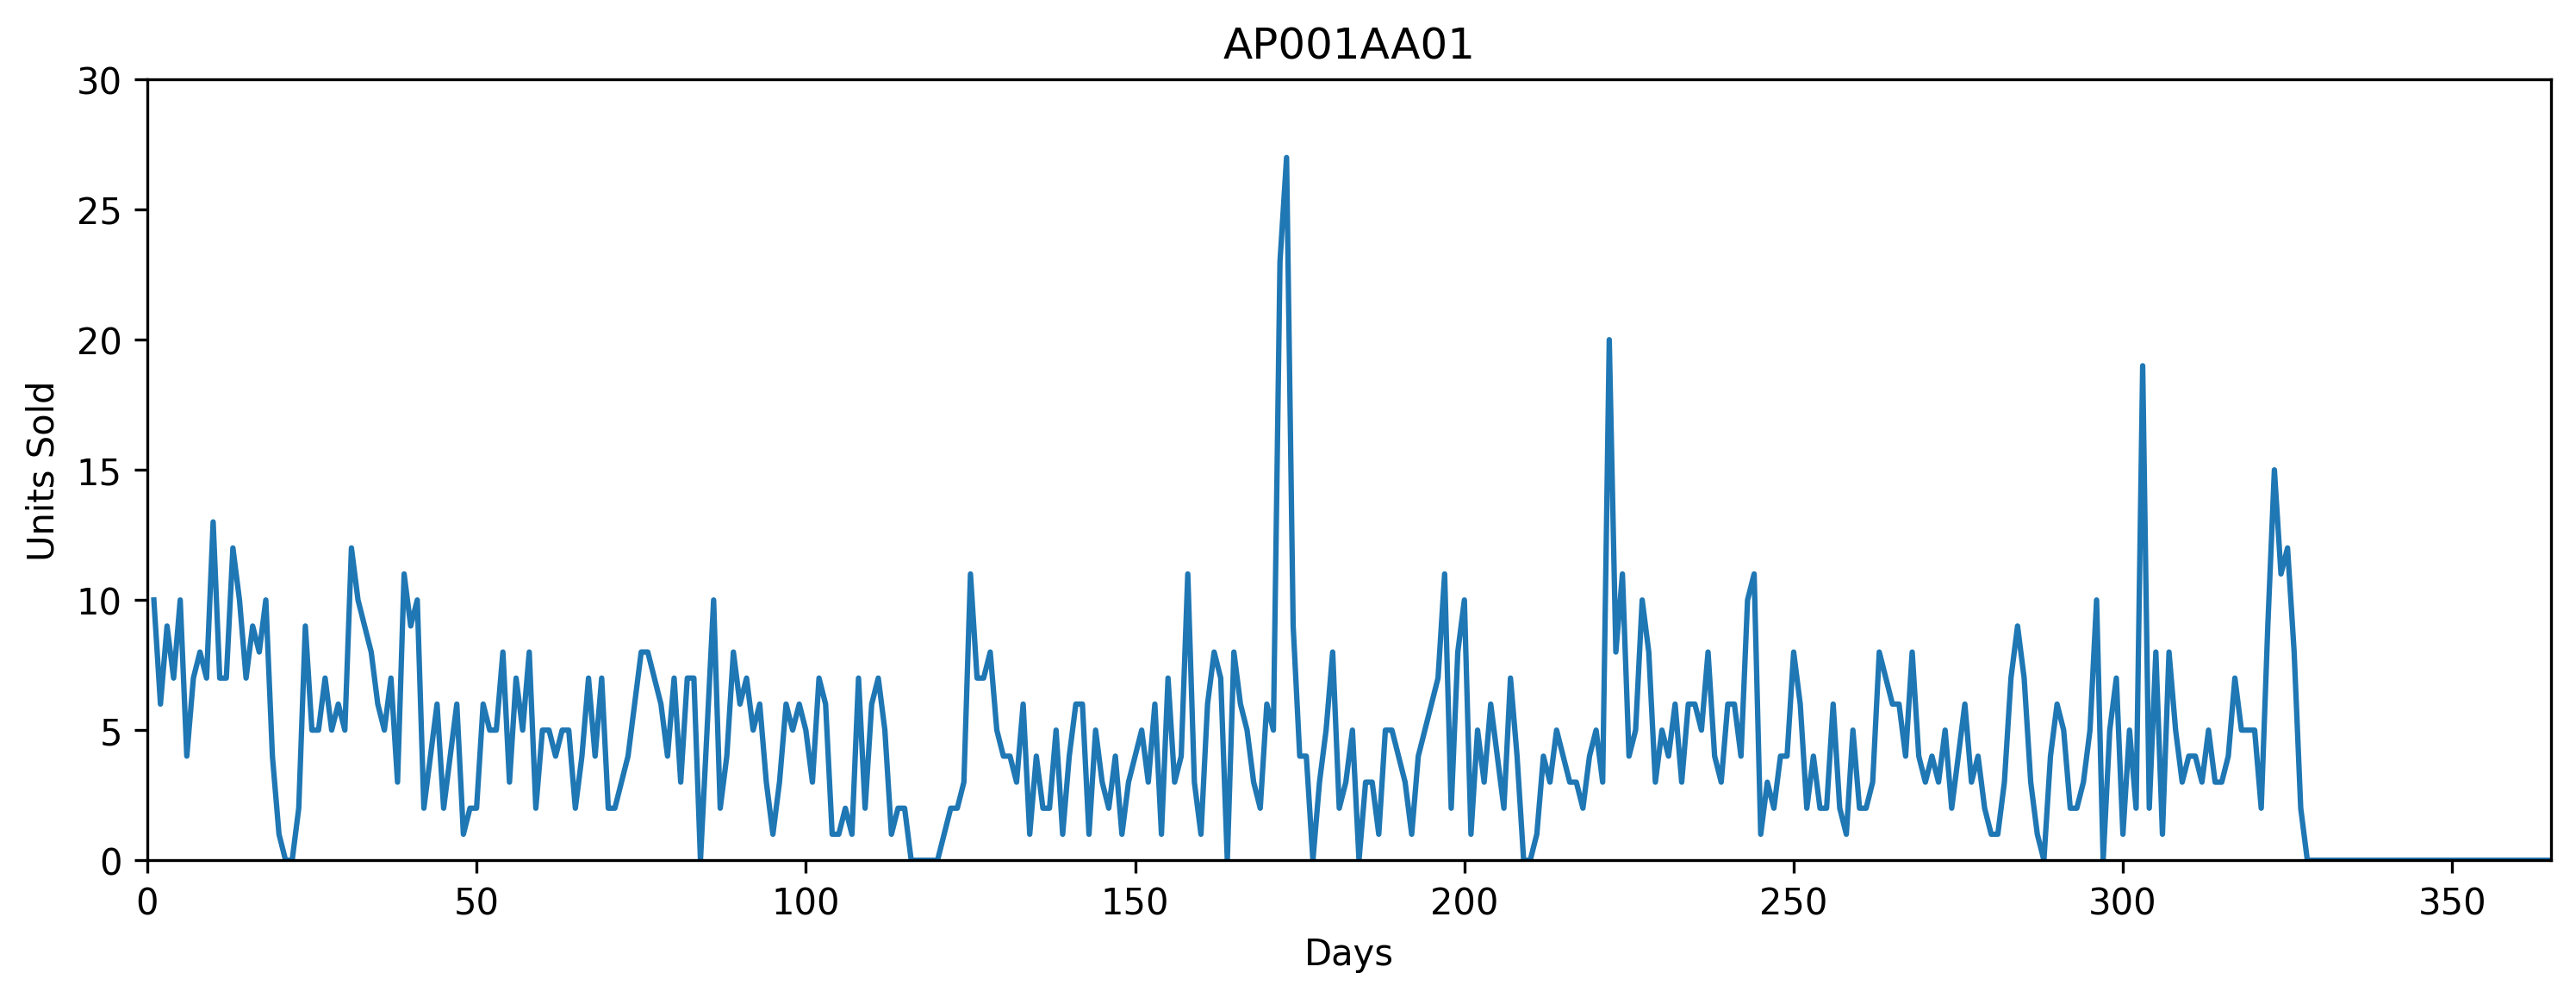

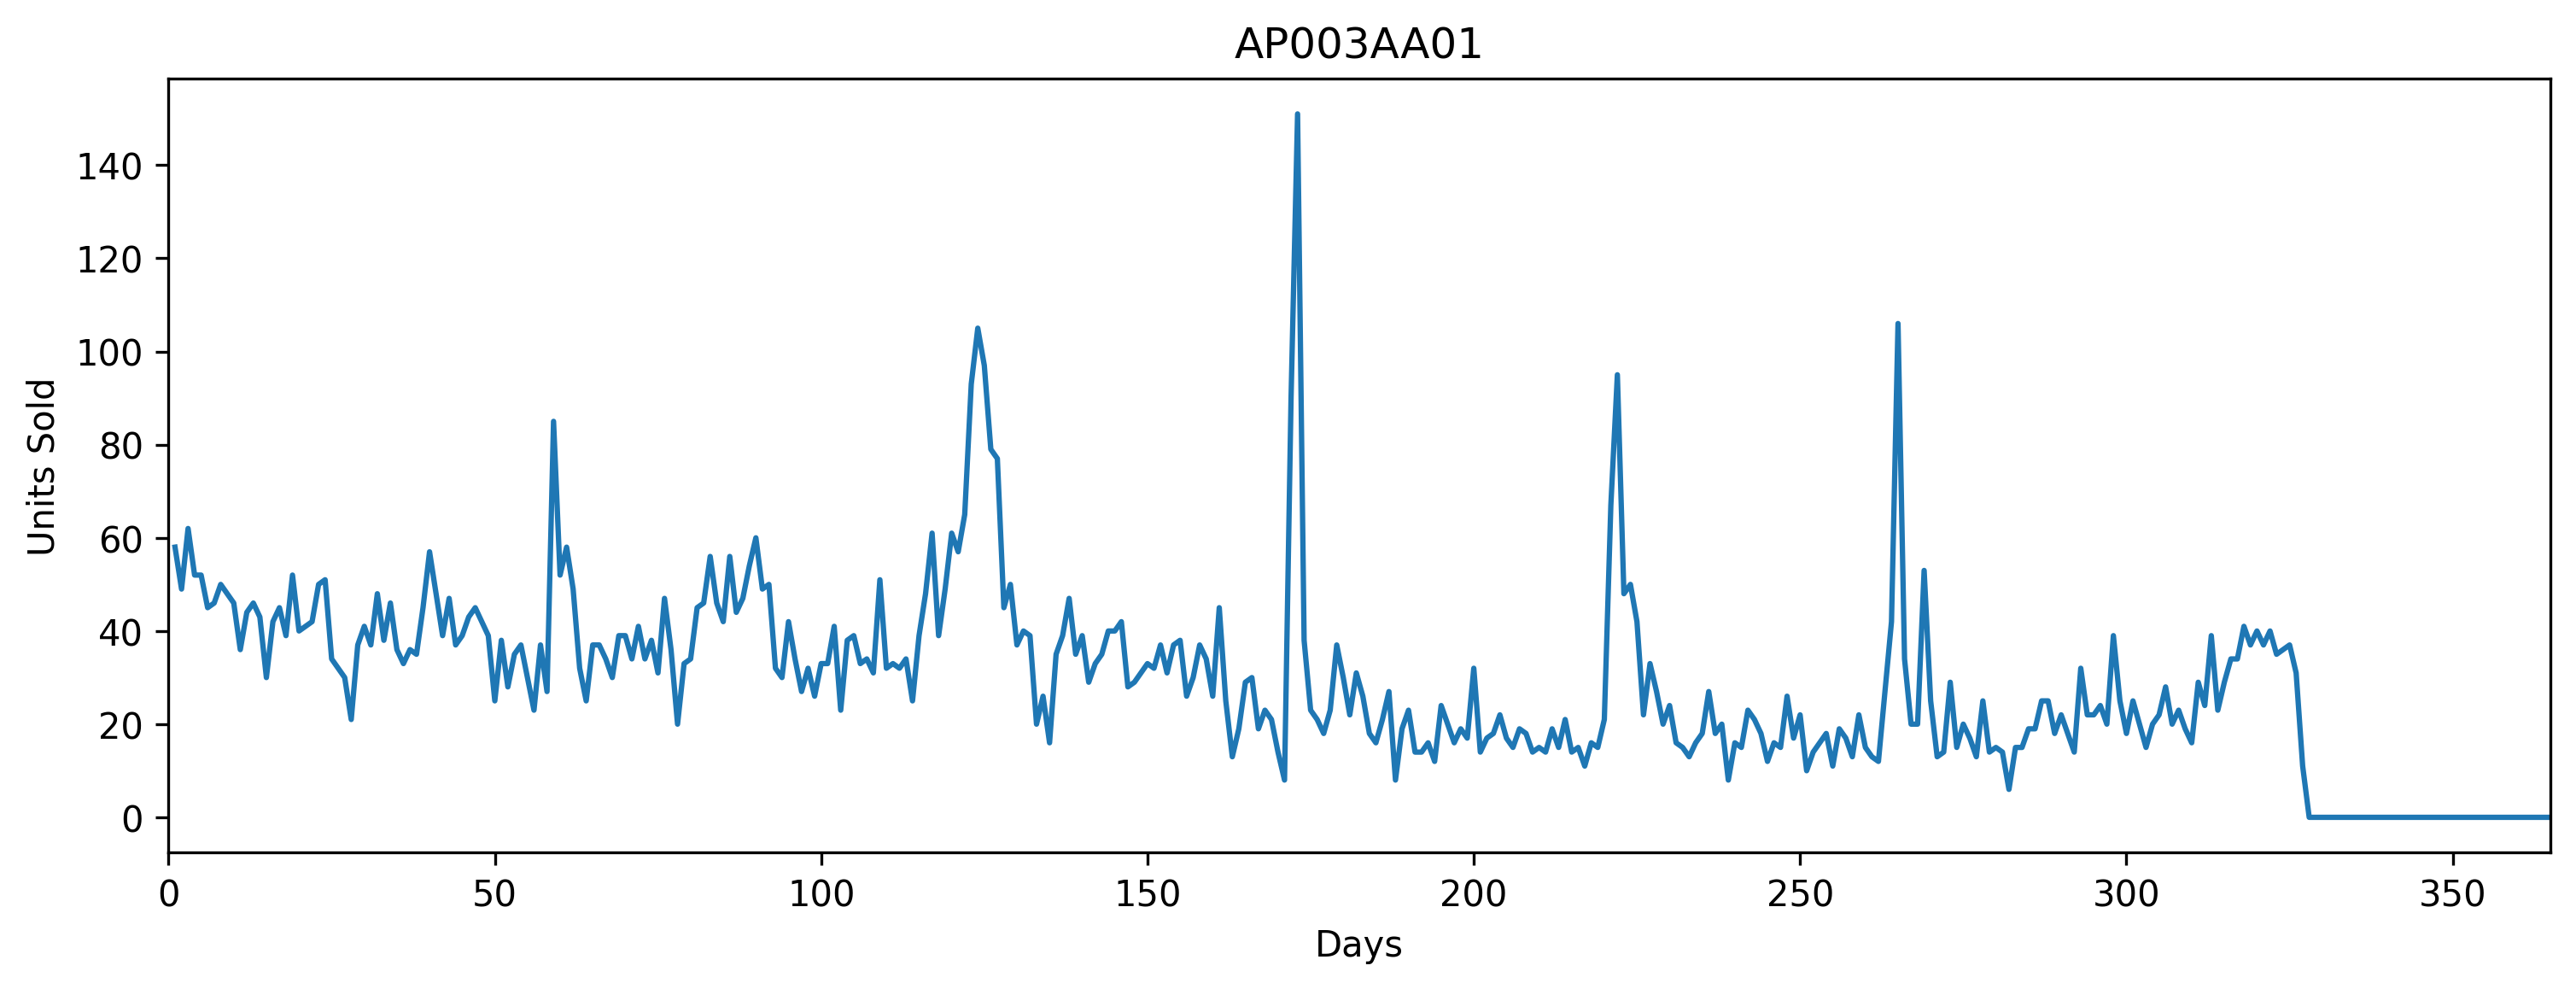

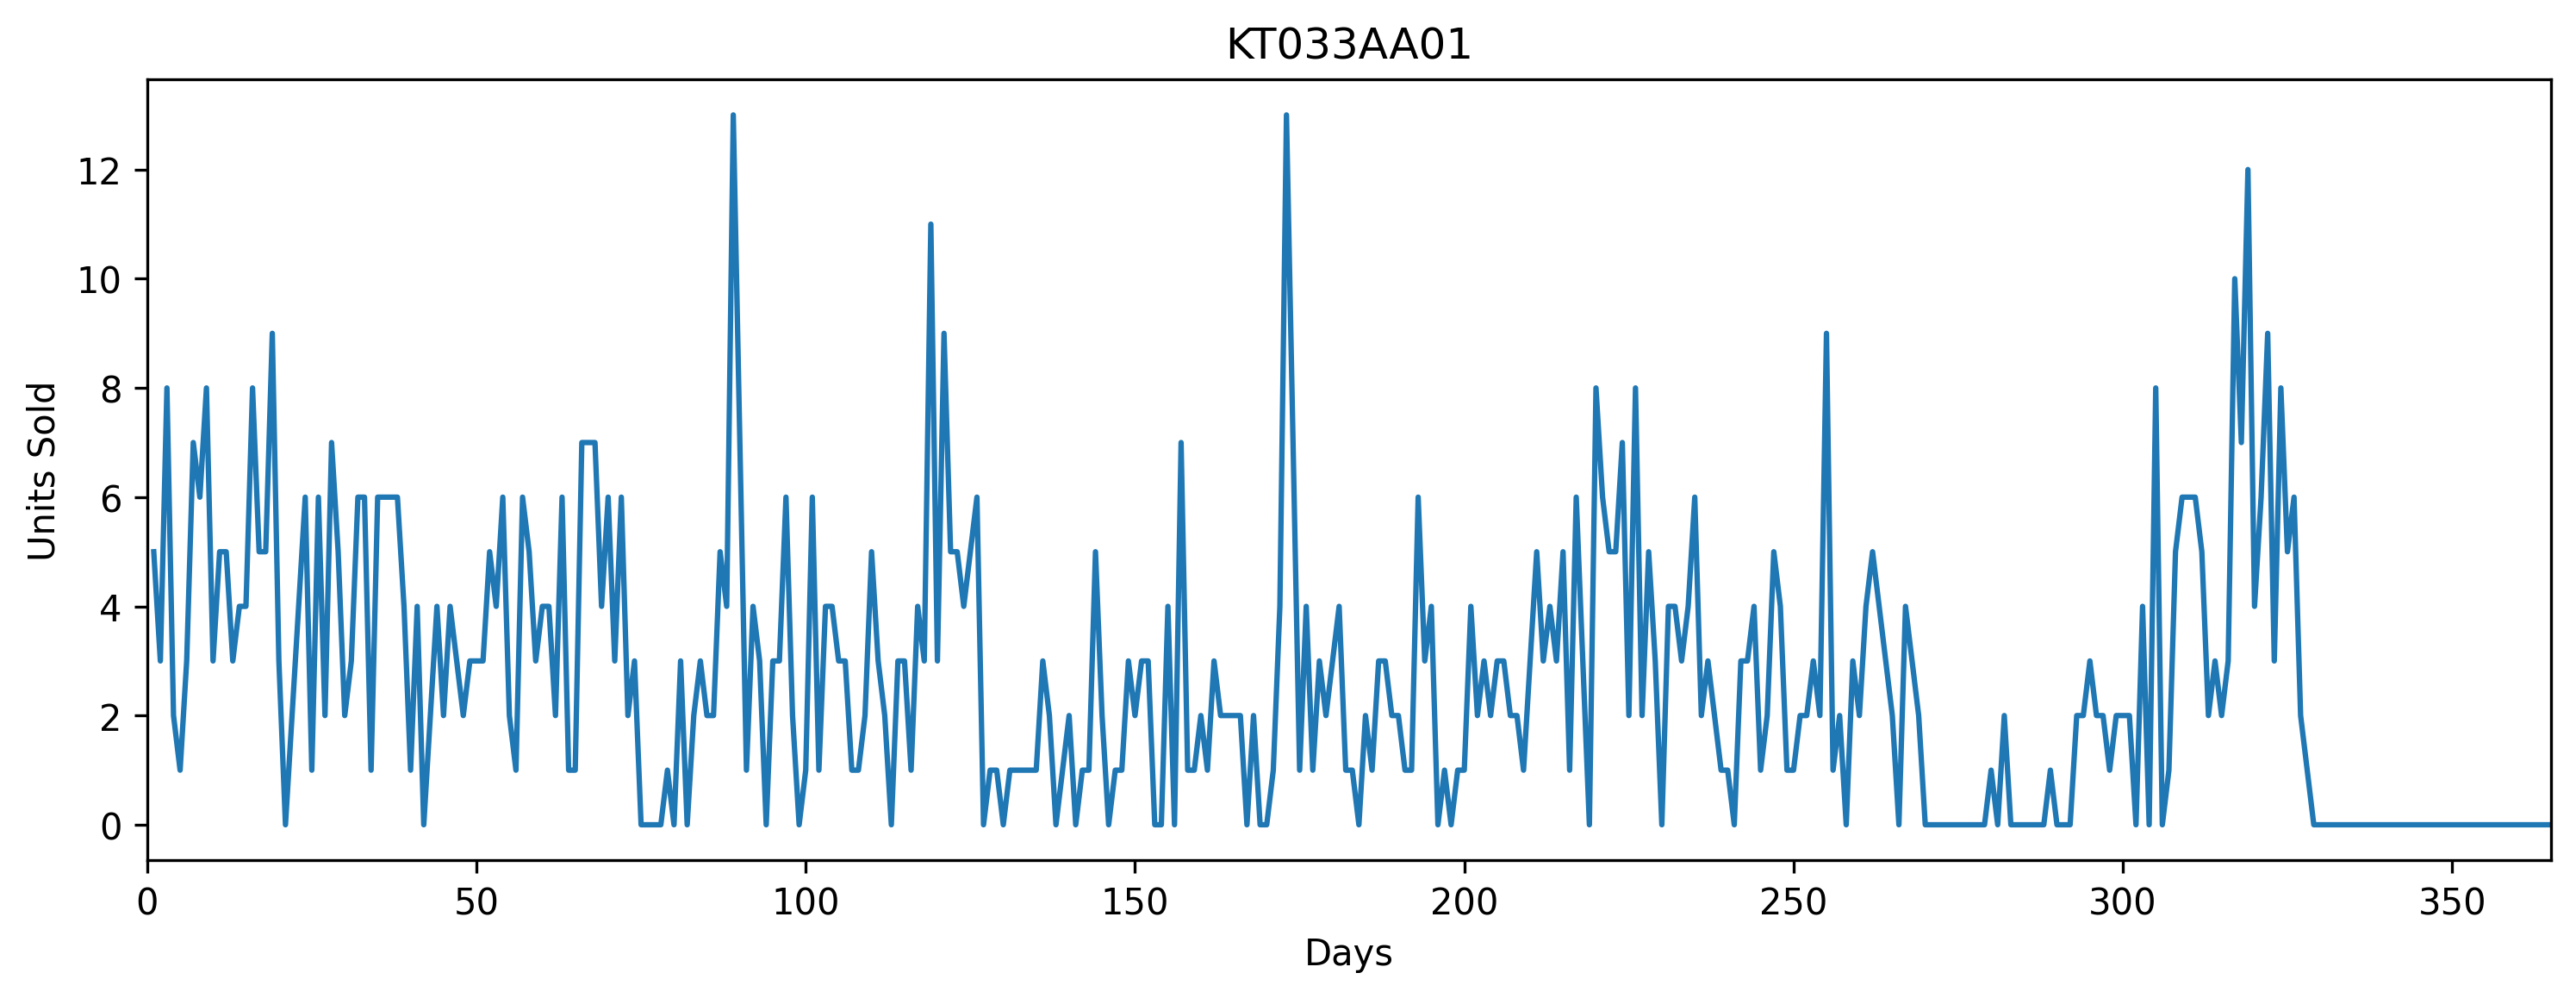

In [36]:
import matplotlib.pyplot as plt
import numpy as np

#Enter random SKU here
a=0
b=7
c=643

##Plotting first product
temp = df_new.iloc[a].tolist()
del temp[0]

xpoints =range(1, 367)
xpoints=list(xpoints)

f = plt.figure(dpi=300)
f.set_figwidth(12)
f.set_figheight(4)
plt.plot(xpoints, temp)
plt.xlabel('Days')
plt.ylabel('Units Sold')
plt.title(df_new.SKU[a])
plt.xlim([0,365])
plt.ylim([0,30])

##Plotting second product
temp = df_new.iloc[b].tolist()
del temp[0]

xpoints =range(1, 367)
xpoints=list(xpoints)

f = plt.figure(dpi=300)
f.set_figwidth(12)
f.set_figheight(4)
plt.plot(xpoints, temp)

plt.xlabel('Days')
plt.ylabel('Units Sold')
plt.title(df_new.SKU[b])
plt.xlim([0,365])
#plt.ylim([0,100])

##Plotting third product
temp = df_new.iloc[c].tolist()
del temp[0]

xpoints =range(1, 367)
xpoints=list(xpoints)

f = plt.figure(dpi=300)
f.set_figwidth(12)
f.set_figheight(4)
plt.plot(xpoints, temp)

plt.xlabel('Days')
plt.ylabel('Units Sold')
plt.title(df_new.SKU[c])
plt.xlim([0,365])

plt.savefig("graph_total.png") #PNG saved to Drive
plt.savefig("graph_total.svg") #Lossless SVG saved to Drive

plt.show()

# **Modeling**

# Splitting Train-Validation-Test Models<br>
We can choose to train on the first 90 days of the dataset and then predict the next 30 days after that. This prediction can be validated with our validation set of 30 days after the training dataset.

In [79]:
ids = sorted(list(set(sales_train_val['SKU'])))
d_cols = [c for c in sales_train_val.columns]
sales_train_val = pd.read_csv('dataset_new.csv')

train_range_start=2
train_range_end=180
validate_range_start=180
validate_range_end=210

train_dataset = sales_train_val[d_cols[train_range_start:train_range_end]]
val_dataset = sales_train_val[d_cols[validate_range_start:validate_range_end]]

print(train_dataset)
print(val_dataset)

      2021-01-01  2021-01-02  2021-01-03  ...  2021-06-25  2021-06-26  2021-06-27
0             10           6           9  ...           4           0           3
1              0           0           0  ...           0           0           0
2              0           0           0  ...           0           1           1
3             12          11           6  ...           6           2           3
4              0           1           0  ...           1           0           0
...          ...         ...         ...  ...         ...         ...         ...
3780           0           0           0  ...           0           0           0
3781           0           0           0  ...           0           0           0
3782           0           0           0  ...           0           0           0
3783           0           0           0  ...           0           0           0
3784           0           0           0  ...           0           0           0

[3785 rows x 17

# Prophet

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds   y
0   2021-01-01  58
1   2021-01-02  49
2   2021-01-03  62
3   2021-01-04  52
4   2021-01-05  52
..         ...  ..
173 2021-06-23  38
174 2021-06-24  23
175 2021-06-25  21
176 2021-06-26  18
177 2021-06-27  23

[178 rows x 2 columns]
           ds
0  2021-06-28
1  2021-06-29
2  2021-06-30
3  2021-07-01
4  2021-07-02
5  2021-07-03
6  2021-07-04
7  2021-07-05
8  2021-07-06
9  2021-07-07
10 2021-07-08
11 2021-07-09
12 2021-07-10
13 2021-07-11
14 2021-07-12
15 2021-07-13
16 2021-07-14
17 2021-07-15
18 2021-07-16
19 2021-07-17
20 2021-07-18
21 2021-07-19
22 2021-07-20
23 2021-07-21
24 2021-07-22
25 2021-07-23
26 2021-07-24
27 2021-07-25
28 2021-07-26
29 2021-07-27
          ds       yhat  yhat_lower  yhat_upper
0 2021-06-28  41.527229   21.361207   61.220637
1 2021-06-29  44.847019   23.708317   64.803767
2 2021-06-30  38.127389   16.810329   58.635857
3 2021-07-01  33.887606   14.186734   54.833476
4 2021-07-02  32.848512   12.170496   54.547613


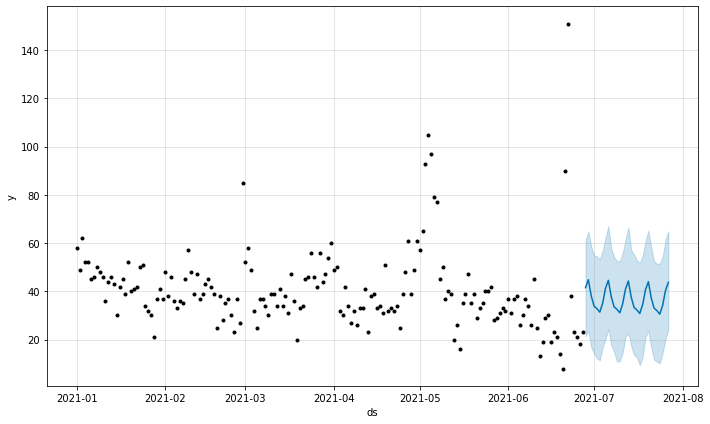

In [82]:
from fbprophet import Prophet
from pandas import to_datetime

predictions = []
temp = train_dataset.iloc[b]
temp2 = train_dataset.columns
temp3 = val_dataset.columns

df_x = pd.DataFrame(np.transpose([temp2, temp]))
df_x.columns = ["ds", "y"]
df_x["ds"]= to_datetime(df_x["ds"])
print(df_x)

model = Prophet(daily_seasonality=False)
model.fit(df_x)

future = temp3
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
print(future)
forecast = model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

#plot forecast
model.plot(forecast)
plt.show()
